### Import Python libraries

In [32]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn_genetic import GASearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn_genetic.space import Integer, Categorical, Continuous

### Import Data

In [33]:
data = pd.read_csv('Data/Country-data.csv', delimiter=',', decimal=".")
df = data.copy()
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### In the dataset, there are three characteristics - imports, exports, and health spending - presented as percentages of GDP per capita. To gain a clearer understanding of each country, we first need to determine the actual values of these features from the percentage figures.

In [34]:
df['health'] = df['health'] * df['gdpp']/100
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


### Visualization

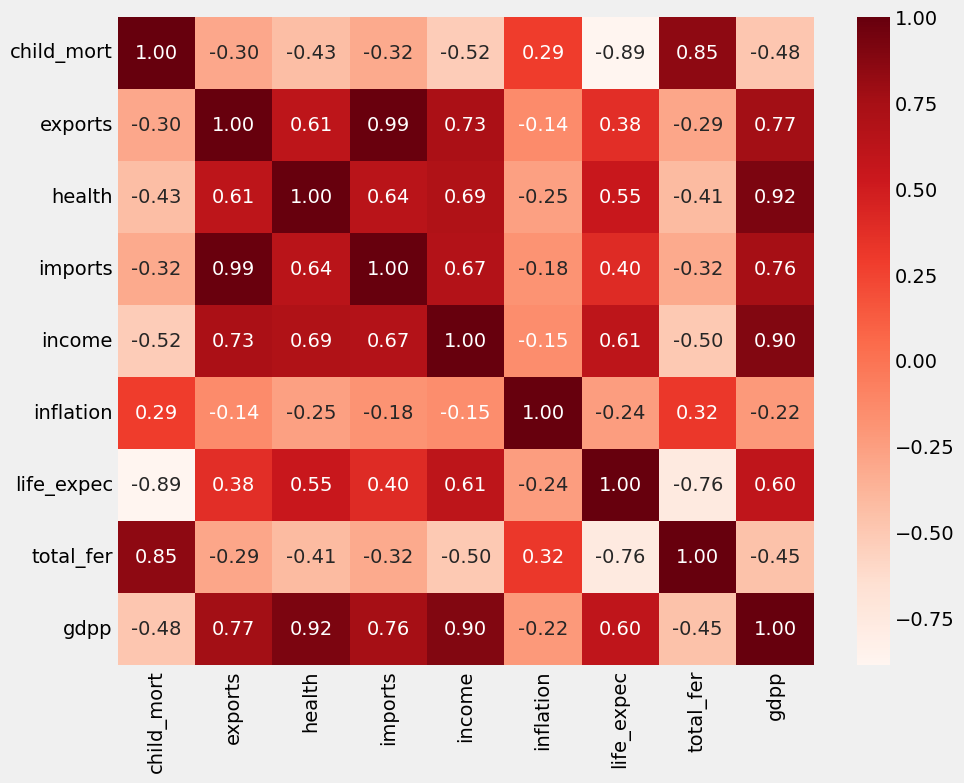

In [35]:
z = df.drop('country', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(z, annot=True, fmt=".2f", cmap='Reds')
plt.show()

In [36]:
for i in df.drop('country', axis=1).columns:
    fig = px.choropleth(df, locationmode='country names', locations='country',projection='albers',
                         title=i+' Per Country',color=i,color_continuous_scale="Teal")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

### Scale and Transform  Data

In [37]:
df2 = df
df2 = df2.set_index(keys='country', drop=True)
scaler = StandardScaler().fit(df2)
dftrans = scaler.transform(df2)
df1 = pd.DataFrame(dftrans, columns = df2.columns, index=df2.index[:])
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,-0.336864,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
Venezuela,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616865,0.546361,-0.316678,0.029323
Vietnam,-0.372315,-0.361463,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,-0.637754


### Clustering Models

#### PCA

In [38]:
pca = PCA(n_components=9) 
pcadf = pd.DataFrame(pca.fit_transform(df1), columns=[f"pc{i}" for i in range(1,10)], index=df1.index)
pca.explained_variance_

array([5.33631081e+00, 1.67006556e+00, 8.97406142e-01, 5.49797220e-01,
       2.74267850e-01, 2.22718073e-01, 8.50864327e-02, 1.40921616e-02,
       4.47261467e-03])

In [39]:
pcadf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
country,,,,,,,,,
Afghanistan,-2.635575,1.472267,-0.549489,-0.242326,0.023530,-0.295663,-0.402107,0.015225,0.021453
Albania,-0.024206,-1.429892,-0.014123,0.450645,-0.125821,0.059231,0.262750,0.000376,-0.033883
Algeria,-0.459557,-0.675495,0.959355,0.218456,-0.113275,-0.415597,0.226681,0.041704,-0.032664
Angola,-2.722630,2.172332,0.600215,-0.433978,0.005433,-0.450064,0.296409,-0.002103,0.029095
Antigua and Barbuda,0.648597,-1.023437,-0.257430,0.289201,0.072694,-0.240630,0.054647,-0.009627,0.089558
...,...,...,...,...,...,...,...,...,...
Vanuatu,-1.175210,-0.275652,-0.667131,0.279628,-0.119733,0.056193,-0.687250,-0.084313,-0.018204
Venezuela,-0.314228,-0.016266,3.680273,0.011835,-0.460468,0.181382,-0.068043,-0.192189,0.000312
Vietnam,-0.594449,-1.076335,0.528875,0.508854,-0.328297,0.219081,0.127677,-0.037543,-0.073860


In [40]:
pcadff = pcadf.drop(columns = [f"pc{i}" for i in range(5,10)])
pcadff.head()

,pc1,pc2,pc3,pc4
country,,,,
Afghanistan,-2.635575,1.472267,-0.549489,-0.242326
Albania,-0.024206,-1.429892,-0.014123,0.450645
Algeria,-0.459557,-0.675495,0.959355,0.218456
Angola,-2.722630,2.172332,0.600215,-0.433978
Antigua and Barbuda,0.648597,-1.023437,-0.257430,0.289201


#### K-Means

In [41]:
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(pcadff)
    inertias.append(kmeans.inertia_)

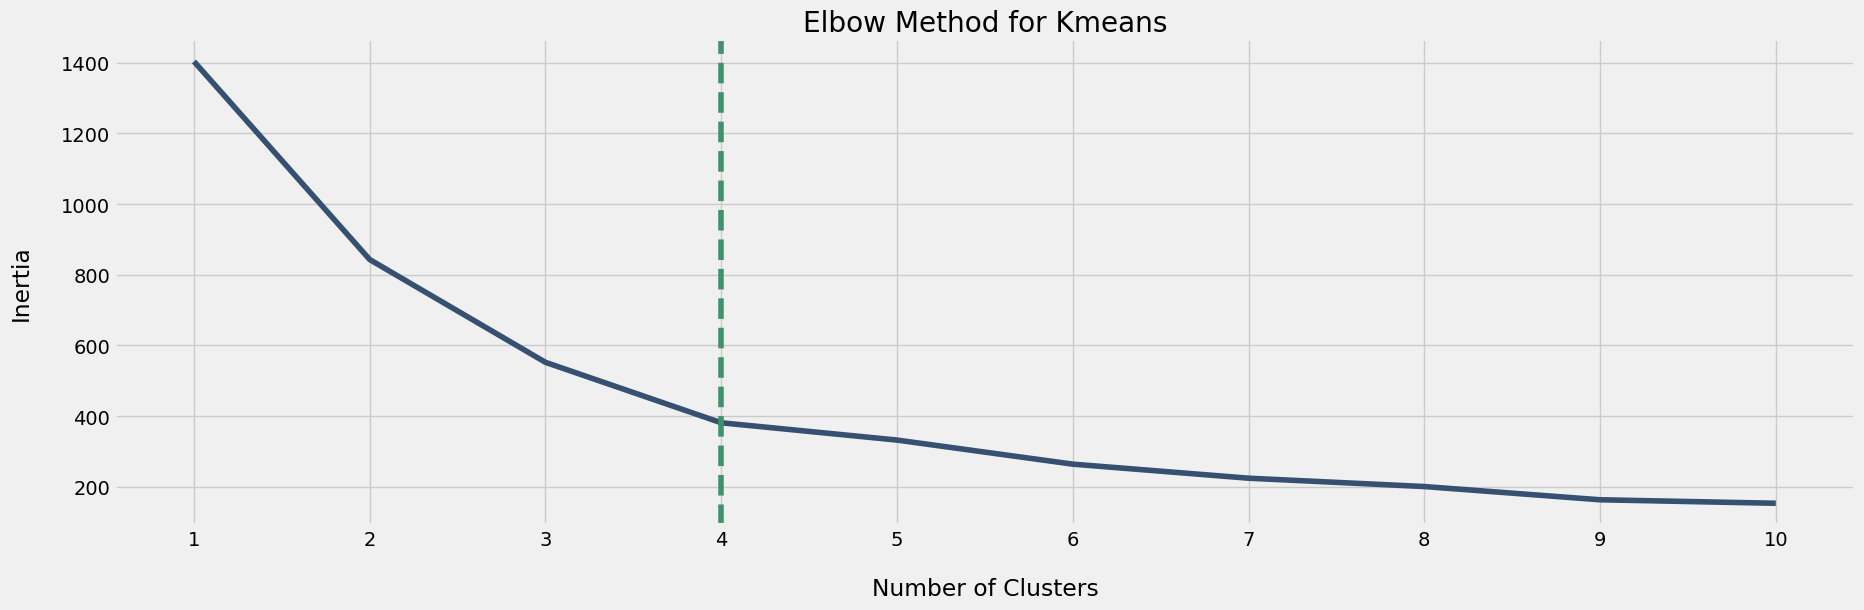

In [42]:
def elbow_optimizer(inertias,i):
    kl = KneeLocator(range(1,11), inertias, curve='convex', direction="decreasing")
    plt.figure(figsize=(20, 6))
    plt.style.use("fivethirtyeight")
    sns.lineplot(x=range(1,11), y=inertias, color='#355070')
    plt.xticks(range(1,11))
    plt.xlabel("Number of Clusters", labelpad=20)
    plt.ylabel("Inertia", labelpad=20)
    plt.title(f"Elbow Method for {i}", y=1)
    plt.axvline(x=kl.elbow, color='#40916c', label='axvline-fullheight', ls='--')
    plt.show()
elbow_optimizer(inertias, 'Kmeans')

#### Hierarchical Model

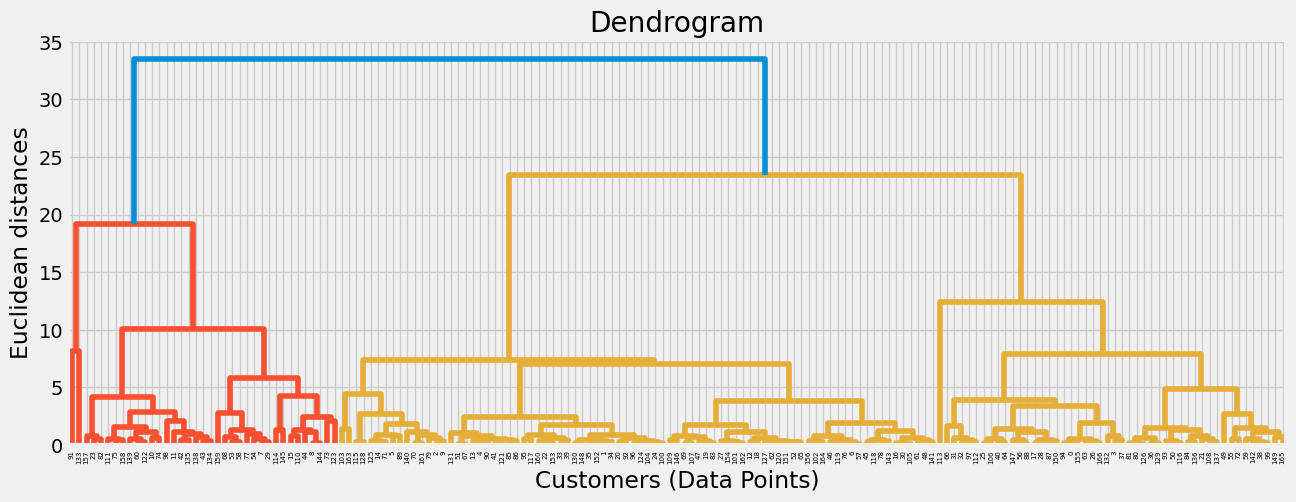

In [43]:
def dendo(data):
    fig=plt.figure(figsize=(14, 5))
    sch.dendrogram(sch.linkage(data, method='ward',metric='euclidean'))
    plt.axhline(y=115, color='#3E3B39', linestyle='--')
    plt.title('Dendrogram')
    plt.xlabel('Customers (Data Points)')
    plt.ylabel('Euclidean distances')
    plt.annotate('Horizontal Cut Line', xy=(15000, 130), xytext=(1, 1), fontsize=8)
    plt.show()
dendo(pcadff)

### Clustering Data

In [44]:
df_cluster = df
df_cluster = df_cluster.set_index(keys='country', drop=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
df_cluster['cluster'] = kmeans.labels_
df_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,2
Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,2
Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,2


In [45]:
label_map = {0: 'High Need for Assitance', 1: 'Low Need for Assitance', 2: 'Moderate Need for Assitance'}
df_cluster['cluster'] = df_cluster['cluster'].map(label_map)
df_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,High Need for Assitance
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Moderate Need for Assitance
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Moderate Need for Assitance
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,High Need for Assitance
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Moderate Need for Assitance
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,Moderate Need for Assitance
Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,Moderate Need for Assitance
Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,Moderate Need for Assitance


In [46]:
print(df_cluster['cluster'].value_counts())

cluster
Moderate Need for Assitance    91
High Need for Assitance        48
Low Need for Assitance         28
Name: count, dtype: int64


In [47]:
clusters = df_cluster.groupby('cluster').apply(lambda x: x.index.tolist())
for cluster, country in clusters.items():
    print(f"Cluster {cluster}:")
    print(", ".join(country))
    print()

Cluster High Need for Assitance:
Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, Solomon Islands, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia

Cluster Low Need for Assitance:
Australia, Austria, Belgium, Brunei, Canada, Cyprus, Denmark, Finland, France, Germany, Iceland, Ireland, Italy, Japan, Kuwait, Luxembourg, Malta, Netherlands, New Zealand, Norway, Qatar, Singapore, Spain, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States

Cluster Moderate Need for Assitance:
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belize, 

In [48]:
df_cluster = df_cluster.reset_index()

color_map = {
    'High Need for Assitance': 'red',
    'Low Need for Assitance': 'green',
    'Moderate Need for Assitance': 'yellow',
}

fig = px.choropleth(
    df_cluster,
    locations="country",
    locationmode="country names",  
    color="cluster",  
    hover_name="country", 
    color_discrete_map=color_map  
)

fig.update_layout(
    title_text='World Map by Clusters',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [49]:
df_cluster = df_cluster.set_index(keys='country', drop=True)
df_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,High Need for Assitance
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Moderate Need for Assitance
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Moderate Need for Assitance
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,High Need for Assitance
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Moderate Need for Assitance
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,Moderate Need for Assitance
Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,Moderate Need for Assitance
Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,Moderate Need for Assitance


### Regresion Models with GASearchCV

In [50]:
df_regression = df.drop("country", axis = 1)
target = df_regression["income"]
features = df_regression.drop("income", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [51]:
models_regression = {
            'LinearRegression': LinearRegression(),
            'DecisionTreeRegressor': DecisionTreeRegressor(),
            'RandomForestRegressor': RandomForestRegressor(),
            'Lasso': Lasso(),
            'Ridge': Ridge(),
            'KNeighborsRegressor': KNeighborsRegressor(),
            'XGBRegressor': GradientBoostingRegressor()
        }

In [52]:
param_grid_regression =  {
            'LinearRegression': {
                "copy_X": Categorical([True, False]),
                "fit_intercept": Categorical([True, False]),
                "positive": Categorical([True, False])
            },
            'DecisionTreeRegressor': {
                "max_depth": Integer(3, 10),
                'min_samples_split': Integer(2, 10),
                'min_samples_leaf': Integer(1, 4)
            },
            'RandomForestRegressor': {
                "n_estimators": Integer(50, 100),
                "max_depth": Integer(5, 10),
                'min_samples_split': Integer(2, 5)
            },
            'Lasso': {
                'alpha': Continuous(0.001, 1.0),
                'fit_intercept': Categorical([True, False]),
                'max_iter': Integer(1000, 2000),
                'tol': Continuous(0.0001, 0.001),
                'selection': Categorical(['cyclic', 'random'])
            },
            'Ridge': {
                'alpha': Continuous(0.1, 10.0),
                'fit_intercept': Categorical([True, False]),
                'tol': Continuous(0.0001, 0.001),
                'solver': Categorical(['auto', 'svd', 'cholesky'])
            },
            'KNeighborsRegressor': {
                'n_neighbors': Integer(3, 7),
                'weights': Categorical(['uniform', 'distance']),
                'algorithm': Categorical(['auto', 'ball_tree', 'kd_tree'])
            },
            'XGBRegressor': {
                'learning_rate': Continuous(0.01, 0.1),
                'n_estimators': Integer(50, 100),
                'max_depth': Integer(3, 5),
                'subsample': Continuous(0.8, 1.0)
            }
        }

In [53]:
benchmark_results_regression = pd.DataFrame(columns=['Model', 'r-squared'])

for name, model in models_regression.items():
    print(f"\nEntrenando {name} con método genético...")
    evolved_estimator = GASearchCV(
        estimator=model,
        cv=5,
        scoring="r2",
        population_size=10,
        generations=8,
        tournament_size=5,
        elitism=True,
        crossover_probability=0.8,
        mutation_probability=0.1,
        param_grid=param_grid_regression[name],
        criteria="max",
        n_jobs=-1,
        verbose=True
    )
    evolved_estimator.fit(X_train_scaled, y_train)
    pred = evolved_estimator.predict(X_test_scaled)
    r_squared = r2_score(y_test, pred)

    print(evolved_estimator.best_params_)
    print("r-squared: ", "{:.2f}".format(r_squared))

    temp_df_regression = pd.DataFrame({'Model': [name], 'r-squared': [r_squared]})
    benchmark_results_regression = pd.concat([benchmark_results_regression, temp_df_regression], ignore_index=True)


Entrenando LinearRegression con método genético...
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	10    	-0.206706	0.837482   	0.803248   	-1.3313    
1  	19    	0.778717 	0.0735915  	0.803248   	0.557942   
2  	17    	0.803248 	0          	0.803248   	0.803248   
3  	19    	0.803248 	0          	0.803248   	0.803248   
4  	20    	0.803248 	0          	0.803248   	0.803248   
5  	18    	0.803248 	0          	0.803248   	0.803248   
6  	20    	0.803248 	0          	0.803248   	0.803248   
7  	19    	0.803248 	0          	0.803248   	0.803248   
8  	18    	0.803248 	0          	0.803248   	0.803248   
{'copy_X': True, 'fit_intercept': True, 'positive': False}
r-squared:  0.87

Entrenando DecisionTreeRegressor con método genético...
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.771607	0.0320655  	0.824948   	0.70821    
1  	18    	0.800538	0.0119621  	0.824948   	0.775947   
2  	19    	0.813097	0.0115017  	0.827899   	0.797454   
3  	18    	0.822115	0

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.841e+08, tolerance: 2.878e+07



1  	20    	0.662936  	0.353123   	0.792095   	-0.395698  
2  	20    	0.785175  	0.0121363  	0.792095   	0.76106    
3  	18    	0.792095  	0          	0.792095   	0.792095   
4  	18    	0.792095  	0          	0.792095   	0.792095   
5  	20    	0.792095  	0          	0.792095   	0.792095   
6  	15    	0.792095  	0          	0.792095   	0.792095   
7  	19    	0.792095  	0          	0.792095   	0.792095   
8  	18    	0.792095  	0          	0.792095   	0.792095   
{'alpha': 1.6033221822398165, 'fit_intercept': True, 'tol': 0.0008955857427243411, 'solver': 'cholesky'}
r-squared:  0.93

Entrenando KNeighborsRegressor con método genético...
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.809548	0.0127472  	0.825487   	0.783938   
1  	19    	0.821594	0.00820332 	0.825487   	0.800244   
2  	19    	0.825487	0          	0.825487   	0.825487   
3  	18    	0.825487	0          	0.825487   	0.825487   
4  	18    	0.825487	0          	0.825487   	0.825487   
5  	18    	0.825487	0  

### Classification Models with GASearchCV

In [54]:
df_classification = df_cluster
target = df_classification["cluster"]
features = df_classification.drop("cluster", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [55]:
models_classification = {
            'KNeighborsClassifier': KNeighborsClassifier(),
            'DecisionTreeClassifier': DecisionTreeClassifier(),
            'RandomForestClassifier': RandomForestClassifier(),
            'AdaBoostClassifier': AdaBoostClassifier(),
            'XGBClassifier': GradientBoostingClassifier()
        }

In [56]:
param_grid_classification =  {
            'KNeighborsClassifier': {
                'n_neighbors': Integer(3, 7),
                'weights': Categorical(['uniform', 'distance']),
                'algorithm': Categorical(['auto', 'ball_tree', 'kd_tree'])
            },
            'DecisionTreeClassifier': {
                "max_depth": Integer(3, 10),
                'min_samples_split': Integer(2, 10),
                'min_samples_leaf': Integer(1, 4)
            },
            'RandomForestClassifier': {
                "n_estimators": Integer(50, 100),
                "max_depth": Integer(5, 10),
                'min_samples_split': Integer(2, 5)
            },
            'AdaBoostClassifier': {
                'learning_rate': Continuous(0.01, 0.1),
                'n_estimators': Integer(50, 100)
            },
            'XGBClassifier': {
                'learning_rate': Continuous(0.01, 0.1),
                'n_estimators': Integer(50, 100),
                'max_depth': Integer(3, 5),
                'subsample': Continuous(0.8, 1.0)
            }
        }

In [57]:
benchmark_results_classification = pd.DataFrame(columns=['Model', 'Accuracy'])

for name, model in models_classification.items():
    print(f"\nEntrenando {name} con método genético...")
    evolved_estimator = GASearchCV(
        estimator=model,
        cv=5,
        scoring="accuracy",
        population_size=10,
        generations=8,
        tournament_size=5,
        elitism=True,
        crossover_probability=0.8,
        mutation_probability=0.1,
        param_grid=param_grid_classification[name],
        criteria="max",
        n_jobs=-1,
        verbose=True
    )
    evolved_estimator.fit(X_train_scaled, y_train)
    pred = evolved_estimator.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, pred)

    print(evolved_estimator.best_params_)
    print("accuracy: ", "{:.2f}".format(accuracy))

    temp_df_classification = pd.DataFrame({'Model': [name], 'Accuracy': [accuracy]})
    benchmark_results_classification = pd.concat([benchmark_results_classification, temp_df_classification], ignore_index=True)


Entrenando KNeighborsClassifier con método genético...
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.951667	0.00695652 	0.956884   	0.939493   
1  	17    	0.956884	1.11022e-16	0.956884   	0.956884   
2  	17    	0.956884	1.11022e-16	0.956884   	0.956884   
3  	17    	0.956884	1.11022e-16	0.956884   	0.956884   
4  	18    	0.956884	1.11022e-16	0.956884   	0.956884   
5  	18    	0.956884	1.11022e-16	0.956884   	0.956884   
6  	18    	0.956884	1.11022e-16	0.956884   	0.956884   
7  	17    	0.956884	1.11022e-16	0.956884   	0.956884   
8  	19    	0.956884	1.11022e-16	0.956884   	0.956884   
{'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'ball_tree'}
accuracy:  0.96

Entrenando DecisionTreeClassifier con método genético...
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.906159	0.0145154  	0.931159   	0.888406   
1  	20    	0.913768	0.00952561 	0.931159   	0.905072   
2  	17    	0.921594	0.00468275 	0.931159   	0.913768   
3  	19    	0.92597

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.919783	0.0102161  	0.939493   	0.905072   
1  	19    	0.928551	0.00660932 	0.939493   	0.922464   
2  	19    	0.934565	0.00570396 	0.948551   	0.931159   
3  	19    	0.936377	0.00696029 	0.948551   	0.922464   
4  	17    	0.937391	0.00392845 	0.940217   	0.931159   
5  	19    	0.940072	0.000177499	0.940217   	0.939855   
6  	20    	0.938261	0.00355811 	0.940217   	0.931159   
7  	19    	0.938406	0.00353516 	0.940217   	0.931159   
8  	19    	0.940217	0          	0.940217   	0.940217   
{'learning_rate': 0.09742368653934173, 'n_estimators': 92, 'max_depth': 3, 'subsample': 0.8338309010525036}
accuracy:  0.96


### Benchmark and WilcoxonResult

In [58]:
print("\nRegression Benchmark Results:")
benchmark_results_regression


Regression Benchmark Results:


,Model,r-squared
0,LinearRegression,0.873009
1,DecisionTreeRegressor,0.834920
2,RandomForestRegressor,0.896861
3,Lasso,0.873968
4,Ridge,0.932121
5,KNeighborsRegressor,0.935170
6,XGBRegressor,0.905836


In [59]:
stats_regression = benchmark_results_regression["r-squared"]
stats.wilcoxon(stats_regression)

WilcoxonResult(statistic=0.0, pvalue=0.015625)

H0similar: The performance evaluations of the six regression models are similar.
H1similar: The performance evaluations of the six regression models are not similar.

For the six regression models, the p-value = 0.0156 < alpha = 0.05.
This indicates a statistically significant difference in the performance evaluations of these models.
Therefore, our approach shows variability across the models.

In [60]:
print("\nClassification Benchmark Results:")
benchmark_results_classification


Classification Benchmark Results:


,Model,Accuracy
0,KNeighborsClassifier,0.960784
1,DecisionTreeClassifier,0.960784
2,RandomForestClassifier,0.960784
3,AdaBoostClassifier,0.921569
4,XGBClassifier,0.960784


In [61]:
stats_classification = benchmark_results_classification["Accuracy"]
stats.wilcoxon(stats_classification)

WilcoxonResult(statistic=0.0, pvalue=0.0625)

H0similar: The performance evaluations of the four classification models are similar.
H1similar: The performance evaluations of the four classification models are not similar.

For the four classification models, the p-value = 0.0625 > alpha = 0.05.
This indicates that there is no statistically significant difference in the performance evaluations of these models.
Thus, our approach demonstrates consistency across the models.